In this notebook we will analyze the accuracy of different code available for lyapunov exponent calculation.

First let's install some packages.

In [ ]:
!git clone https://github.com/Shibu778/nolitsa.git

Cloning into 'nolitsa'...
remote: Enumerating objects: 823, done.
remote: Total 823 (delta 0), reused 0 (delta 0), pack-reused 823
Receiving objects: 100% (823/823), 432.86 KiB | 1.42 MiB/s, done.
Resolving deltas: 100% (546/546), done.


In [ ]:
!git clone https://github.com/Shibu778/nolds.git

Cloning into 'nolds'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1822 (delta 1), reused 4 (delta 1), pack-reused 1814
Receiving objects: 100% (1822/1822), 847.87 KiB | 2.77 MiB/s, done.
Resolving deltas: 100% (1222/1222), done.


[1.3360698  0.06093564]


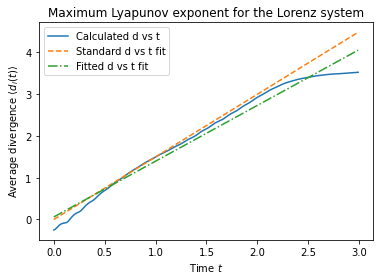

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Maximum Lyapunov exponent for the Lorenz system.
Our estimate is quite close to the "accepted" value of 1.50.
Cf. Fig. 2 of Rosenstein et al. (1993).
"""

from nolitsa.nolitsa import data, lyapunov
import numpy as np
import matplotlib.pyplot as plt

sample = 0.01
x0 = [0.62225717, -0.08232857, 30.60845379]
x = data.lorenz(length=5000, sample=sample, x0=x0,
                sigma=16.0, beta=4.0, rho=45.92)[1][:, 0]

# Choose appropriate Theiler window.
window = 60
maxt = 300

# Time delay.
tau = 13

# Embedding dimension.
dim = [5]


d = lyapunov.mle_embed(x, dim=dim, tau=tau, maxt=maxt, window=window)[0]
t = np.arange(maxt)
f = np.polyfit(sample*t, d,1)
print(f)
plt.title('Maximum Lyapunov exponent for the Lorenz system')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(sample * t, d, label = 'Calculated d vs t')
plt.plot(sample * t, sample * t * 1.50, '--', label = 'Standard d vs t fit')
plt.plot(sample*t, sample*t*f[0]+f[1], '-.', label = 'Fitted d vs t fit')
plt.legend()

plt.show()

In [ ]:
y = data.lorenz(length=5000, sample=sample, x0=x0,
                sigma=16.0, beta=4.0, rho=45.92)

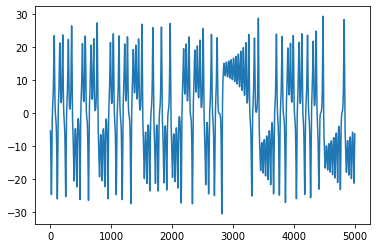

In [ ]:
plt.plot(y[1][:,0])

### Using nolds lyap_r function

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Maximum Lyapunov exponent for the Lorenz system.
Our estimate is quite close to the "accepted" value of 1.50.
Cf. Fig. 2 of Rosenstein et al. (1993).
"""

from nolds.nolds.measures import lyap_r
import numpy as np
import matplotlib.pyplot as plt


# Choose appropriate Theiler window.
window = 60
maxt = 300

# Time delay.
tau = 13

# Embedding dimension.
dim = 5


lle = lyap_r(x, emb_dim = 5, lag = tau, min_tsep = window, tau= sample, trajectory_len=maxt, 
             fit='poly',plot_file='file', debug_plot=True)
lle

1.3418574164135884

In [ ]:
import pandas as pd
df = pd.DataFrame({'x':x})
df.to_excel('hennon_x_dt_20_01.xlsx', index=False)